In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train-chennai-sale (1).csv')

In [ ]:
data.shape

(7109, 22)

In [ ]:
data.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [ ]:
data = data.drop(columns=["PRT_ID","REG_FEE","COMMIS"])

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

AREA 
******************************************************

In [ ]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data.AREA.replace('Karapakam','Karapakkam', inplace=True)
data.AREA.replace('Ann Nagar','Anna Nagar', inplace=True)
data.AREA.replace('Adyr','Adyar', inplace=True)
data.AREA.replace('Valchery','Velachery', inplace=True)
data.AREA.replace('Velchery','Velachery', inplace=True)
data.AREA.replace('Chrompt','Chrompet', inplace=True)
data.AREA.replace('Chormpet','Chrompet', inplace=True)
data.AREA.replace('Chrmpet','Chrompet', inplace=True)
data.AREA.replace('KKNagar','KK Nagar', inplace=True)
data.AREA.replace('TNagar','T Nagar', inplace=True)
data.AREA.replace('Ana Nagar','Anna Nagar', inplace=True)

In [ ]:
data.AREA.isnull().sum()

0

INT_SQFT
******************************************************

In [ ]:
data.INT_SQFT.isnull().sum()

0

In [ ]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

DATE BUILD
******************************************************

In [ ]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [ ]:
data.DATE_BUILD.isnull().sum()

0

AGE OF BUILDING
******************************************************

In [ ]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE)

In [ ]:
data.DATE_BUILD = data.DATE_BUILD.dt.year
data.DATE_SALE = data.DATE_SALE.dt.year

In [ ]:
data["HOME_AGE"]=data.DATE_SALE-data.DATE_BUILD

In [ ]:
data = data.drop(columns=['DATE_BUILD','DATE_SALE'])

In [ ]:
data.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOME_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
5,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750,5
6,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8488790,28
7,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,10
8,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970,34
9,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650,15


DISTANCE MAINROAD
******************************************************

In [ ]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [ ]:
data.DIST_MAINROAD.isnull().sum()

0

N BEDROOM
******************************************************

In [ ]:
data.N_BEDROOM.isnull().sum()

1

In [ ]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
data= data.dropna(subset=['N_BEDROOM'])

N BATHROOM
******************************************************

In [ ]:
data.N_BATHROOM.isnull().sum()

5

In [ ]:
data.N_BATHROOM.describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [ ]:
data= data.dropna(subset=['N_BATHROOM'])

N ROOM
******************************************************

In [ ]:
data.N_ROOM.isnull().sum()

0

In [ ]:
data.N_ROOM.describe()

count    7103.000000
mean        3.688723
std         1.019299
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

SALE CONDITION
******************************************************


In [ ]:
data.SALE_COND.isnull().sum()

0

In [ ]:
data.SALE_COND.describe()

count        7103
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND.replace('AbNormal','Abnormal', inplace=True)
data.SALE_COND.replace('Ab Normal','Abnormal', inplace=True)
data.SALE_COND.replace('AdjLand','Adj Land', inplace=True)
data.SALE_COND.replace('Partiall','Partial', inplace=True)
data.SALE_COND.replace('PartiaLl','Partial', inplace=True)

In [ ]:
data.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
data['SALE_COND'].value_counts()

Adj Land       1439
Partial        1430
Normal Sale    1422
Abnormal       1410
Family         1402
Name: SALE_COND, dtype: int64

PARK FACILITY
******************************************************

In [ ]:
data.PARK_FACIL.isnull().sum()

0

In [ ]:
data.PARK_FACIL.describe()

count     7103
unique       3
top        Yes
freq      3584
Name: PARK_FACIL, dtype: object

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL.replace('Noo','No',inplace=True)

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

BUILD TYPES
******************************************************

In [ ]:
data.BUILDTYPE.isnull().sum()

0

In [ ]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE.replace('Others','Other', inplace=True)
data.BUILDTYPE.replace('Comercial','Commercial', inplace=True)

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'HOME_AGE'],
      dtype='object')

UTILITY AVAIL
******************************************************


In [ ]:
data.UTILITY_AVAIL.isnull().sum()

0

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL.replace('AllPub','All Pub', inplace=True)

In [ ]:
data.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

STREET
******************************************************


In [ ]:
data.STREET.isnull().sum()

0

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET.replace('Pavd','Paved',inplace = True)
data.STREET.replace('NoAccess','No Access',inplace = True)

MZZONE
******************************************************

In [ ]:
data.MZZONE.isnull().sum()

0

In [ ]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

SALES PRICE
******************************************************

In [ ]:
data.SALES_PRICE.isnull().sum()

0

In [ ]:
data.SALES_PRICE.describe()

count    7.103000e+03
mean     1.089477e+07
std      3.769549e+06
min      2.156875e+06
25%      8.270900e+06
50%      1.033464e+07
75%      1.299422e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

QS OVERALL
******************************************************

In [ ]:
data.QS_OVERALL.isnull().sum()

47

In [ ]:
data.QS_OVERALL.values[0]

4.33

In [ ]:
data = data.drop(columns=['QS_BATHROOM','QS_BEDROOM','QS_ROOMS','DIST_MAINROAD','QS_OVERALL'])

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOME_AGE
0,Karapakkam,1004,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1.0,1.0,3,Abnormal,Yes,Other,All Pub,Gravel,C,7406250,30


In [ ]:
data.dropna()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOME_AGE
0,Karapakkam,1004,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1.0,1.0,3,Abnormal,Yes,Other,All Pub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1.0,1.0,2,Adj Land,No,Other,ELO,No Access,RM,5353000,49
7105,Velachery,1897,3.0,2.0,5,Family,Yes,Other,NoSeWa,No Access,RH,10818480,9
7106,Velachery,1614,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,32


**EDA** [EXPLORATORY DATA ANALYSIS]
******************************************************

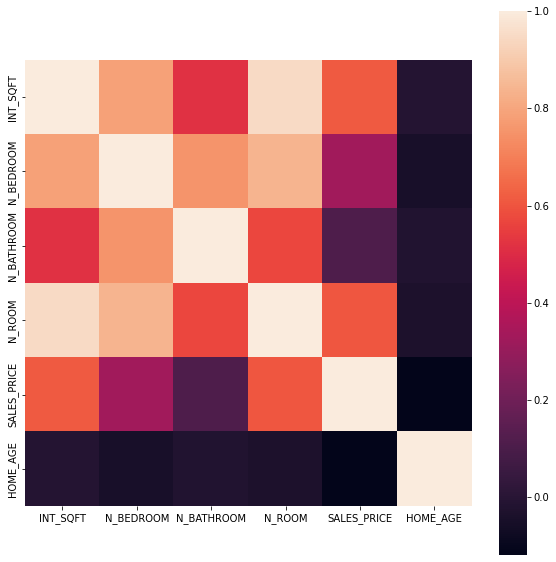

In [ ]:
#COORELATION MATRIX
rel = data.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rel, square=True);

In [ ]:
A=data.AREA.groupby(data.AREA).count()
B=data.AREA.groupby(data.BUILDTYPE).count()
C=data.AREA.groupby(data.UTILITY_AVAIL).count()
D=data.AREA.groupby(data.STREET).count()
E=data.AREA.groupby(data.MZZONE).count()
F=data.AREA.groupby(data.PARK_FACIL).count()

Text(0.5, 1.0, 'AREA VS SALES_PRICE')

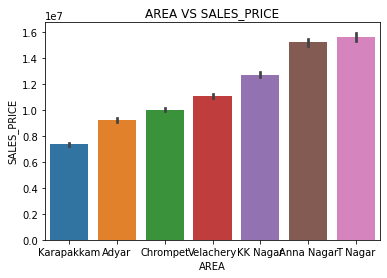

In [ ]:
sns.barplot(x=data['AREA'],y=data['SALES_PRICE'],order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title("AREA VS SALES_PRICE")

here is linear relationship between area and sales as it is showing straight line graph and there is only two possible values hence label encoding is use here  

Text(0.5, 1.0, 'UTILITY_AVAIL VS SALES_PRICE')

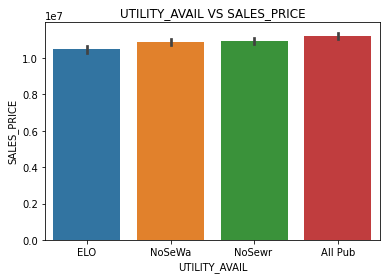

In [ ]:
sns.barplot(x=data['UTILITY_AVAIL'],y=data['SALES_PRICE'],order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("UTILITY_AVAIL VS SALES_PRICE")

here also same linear relationship between Utility avail and sales price and encoding is label encoding

Text(0.5, 1.0, 'BUILD TYPE VS SALES PRICE')

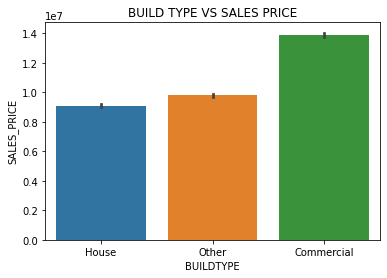

In [ ]:
sns.barplot(x=data['BUILDTYPE'],y=data['SALES_PRICE'],order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("BUILD TYPE VS SALES PRICE")

here is no relationship between buildtype and sales price because it is not forming straight line.one hot encoding is use here 

Text(0.5, 1.0, 'MZZONE VS SALES_PRICE')

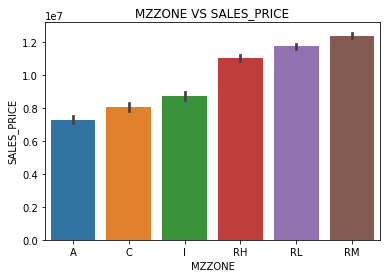

In [ ]:
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title("MZZONE VS SALES_PRICE")

It is showing straight line hence there is linear relationship between MZzone and sales price.label encoding used here

Text(0.5, 1.0, 'INT_SQFT VS SALES_PRICE')

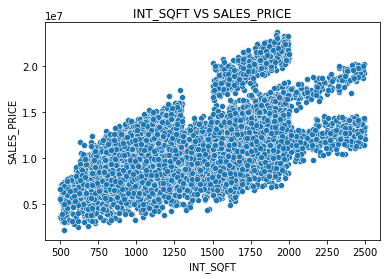

In [ ]:
sns.scatterplot(x=data["INT_SQFT"],y=data["SALES_PRICE"])
data[["INT_SQFT","SALES_PRICE"]]
plt.title("INT_SQFT VS SALES_PRICE")

Text(0.5, 1.0, 'N_BEDROOM VS SALES_PRICE')

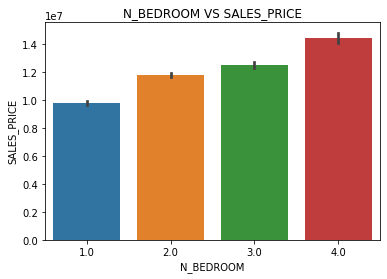

In [ ]:
sns.barplot(x=data["N_BEDROOM"],y=data["SALES_PRICE"],order=data.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])
data[["N_BEDROOM","SALES_PRICE"]]
plt.title("N_BEDROOM VS SALES_PRICE")

linear relationship between bedroom and sales price

Text(0.5, 1.0, 'N_BATHROOM VS SALES_PRICE')

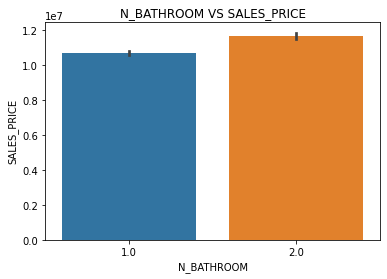

In [ ]:
sns.barplot(x=data.N_BATHROOM,y=data.SALES_PRICE)
plt.title("N_BATHROOM VS SALES_PRICE")

Text(0.5, 1.0, 'N_ROOM VS SALES_PRICE')

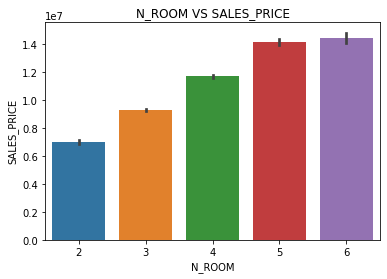

In [ ]:
sns.barplot(x=data.N_ROOM,y=data.SALES_PRICE)
plt.title("N_ROOM VS SALES_PRICE")

showing very good linear relationship between rooms and sales price

Text(0.5, 1.0, 'SALE_COND VS SALES_PRICE ')

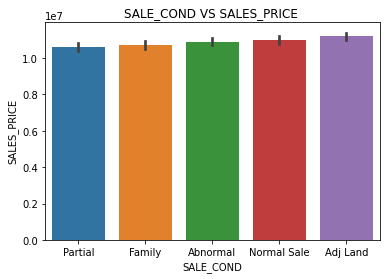

In [ ]:
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])
plt.title("SALE_COND VS SALES_PRICE ")

showing linear relationship between sale condition and sales price.label encoding is use here

Text(0.5, 1.0, 'STREET VS SALES_PRICE')

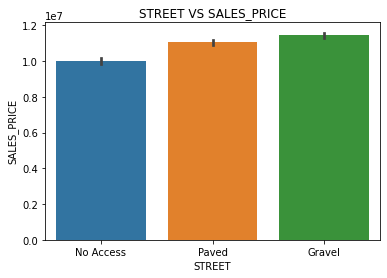

In [ ]:
sns.barplot(x=data['STREET'],y=data['SALES_PRICE'],order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("STREET VS SALES_PRICE")

linearity exist here.it is showing relationship between street and sales price.encoding is label encoding

Text(0.5, 1.0, 'PARK_FACIL VS SALES_PRICE')

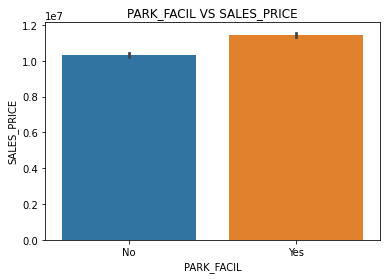

In [ ]:
sns.barplot(x=data['PARK_FACIL'],y=data['SALES_PRICE'],order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("PARK_FACIL VS SALES_PRICE")

linear relationship between parking facility and sales price.label encoding is use

,HOME_AGE,SALES_PRICE
0,44,7600000
1,11,21717770
2,20,13159200
3,22,9630290
4,30,7406250
...,...,...
7104,49,5353000
7105,9,10818480
7106,28,8351410
7107,32,8507000


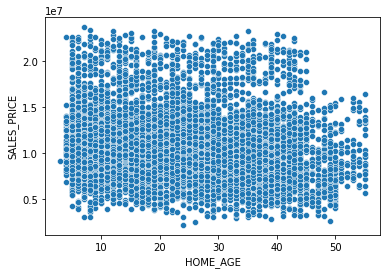

In [ ]:
sns.scatterplot(x=data.HOME_AGE,y=data.SALES_PRICE)
data[["HOME_AGE","SALES_PRICE"]]

In [ ]:
data.isnull().sum()

AREA             0
INT_SQFT         0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
HOME_AGE         0
dtype: int64

# **ENCODING**
************************************************************************************************************

In [ ]:
data['AREA']=data['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
data["SALE_COND"]=data["SALE_COND"].map({'Abnormal':1, 'Family':3, 'Partial':4, 'Adj Land':5, 'Normal Sale':6})
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].map({'All Pub':6, 'ELO':1, 'NoSewr ':3, 'NoSeWa':4})
data["STREET"]=data["STREET"].map({'No Access':1,'Paved':3,'Gravel':4})
data["PARK_FACIL"]=data["PARK_FACIL"].map({'No':0,'Yes':1})
data["MZZONE"]=data["MZZONE"].map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})


In [ ]:
#dummies1=pd.get_dummies(data["BUILDTYPE"])
#data=pd.concat([data,dummies1],axis="columns")
#data=data.drop("BUILDTYPE",axis=1)

In [ ]:
data=pd.get_dummies(data, prefix="BUILDTYPE",columns=["BUILDTYPE"],drop_first=False)
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOME_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,1.0,1.0,3,1,1,6,3,1,7600000,44,1,0,0
1,6,1986,2.0,1.0,5,1,0,6,4,5,21717770,11,1,0,0
2,2,909,1.0,1.0,3,1,1,1,4,6,13159200,20,1,0,0
3,4,1855,3.0,2.0,5,3,0,3,3,3,9630290,22,0,0,1
4,1,1226,1.0,1.0,3,1,1,6,4,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1.0,1.0,2,5,0,1,1,7,5353000,49,0,0,1
7105,4,1897,3.0,2.0,5,3,1,4,1,5,10818480,9,0,0,1
7106,4,1614,2.0,1.0,4,6,0,4,4,3,8351410,28,0,1,0
7107,1,787,1.0,1.0,2,4,1,1,3,6,8507000,32,1,0,0


# **LINEAR REGRESSION**
*******************************************************



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=data.drop("SALES_PRICE", axis="columns")
Y=data["SALES_PRICE"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((5682, 14), (1421, 14), (5682,), (1421,))

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9162870657901503

In [ ]:
Y_pred=lr.predict(X_test)
Y_pred

array([10531705.01206136, 11353550.13112874, 12383680.16518944, ...,
       12463700.0819922 ,  5049787.80382289, 13928832.70367573])

In [ ]:
print(lr.intercept_)

10905729.212425202


#FEATURES IMPORTANCE USING COEFFICIENT METHOD

In [ ]:
coef_data=pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])
Y_predict= lr.predict(X_test)
coef_data

,Coefficient
AREA,1.040185e+06
INT_SQFT,7.134349e+05
N_BEDROOM,-1.258622e+06
N_BATHROOM,8.920404e+04
N_ROOM,1.720963e+06
SALE_COND,6.555670e+04
PARK_FACIL,5.139805e+05
UTILITY_AVAIL,2.710041e+04
STREET,3.795870e+05
MZZONE,8.701531e+05


# EVALUATION

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y_test,lr.predict(X_test))
accuracy

0.9162870657901503

## KNN REGRESSOR MODEL

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train, Y_train)
  print("K value :", i, "val Accuracy :" , np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))


K value : 1 val Accuracy : 0.9215423514402744
K value : 2 val Accuracy : 0.9401332703620865
K value : 3 val Accuracy : 0.943825719720342
K value : 4 val Accuracy : 0.9464919134986982
K value : 5 val Accuracy : 0.9466146851179567
K value : 6 val Accuracy : 0.9457522115284022
K value : 7 val Accuracy : 0.945180999858873
K value : 8 val Accuracy : 0.9435981782921603
K value : 9 val Accuracy : 0.9420074367377544
K value : 10 val Accuracy : 0.940381128849286
K value : 20 val Accuracy : 0.928764806857634
K value : 30 val Accuracy : 0.919641283399258
K value : 40 val Accuracy : 0.9132132858357196
K value : 50 val Accuracy : 0.9070957469761842


# DECISION TREE REGRESSOR

In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,60]:
  data = DecisionTreeRegressor(max_depth = depth)
  data.fit(X_train , Y_train)
  accuracy = r2_score(Y_test,data.predict(X_test))
  data = DecisionTreeRegressor(max_depth = depth)
  val = cross_val_score(data, X, Y, cv=10)
  print(depth, accuracy, np.mean(val))

1 0.3532550382955032 0.35884747555797664
2 0.668570600566231 0.6820395137409319
3 0.7935469304359921 0.8017288018824633
4 0.877917501198003 0.8821816531519243
5 0.9175355024374305 0.9151976043917479
6 0.9359857875233057 0.9358913472719724
7 0.95165565951167 0.9504320550343935
8 0.9609704490882987 0.9620247280364336
9 0.9676652785281122 0.9690960792649943
10 0.9700141463686993 0.9730499445441512
20 0.9719089433067498 0.9750240366887274
30 0.9716011001830829 0.974963043054978
40 0.9719271426499908 0.9750131332337266
60 0.9724558990722252 0.9751409931962369


In [ ]:
X.shape , X_test.shape, X_train.shape

((7103, 14), (1421, 14), (5682, 14))

# FEATURES IMPORTANCE

In [ ]:
data= DecisionTreeRegressor(max_depth= 20)
data.fit(X_train, Y_train)
importances = list(data.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances


[('AREA', 0.48),
 ('BUILDTYPE_Commercial', 0.33),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('HOME_AGE', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('BUILDTYPE_House', 0.0),
 ('BUILDTYPE_Other', 0.0)]

In [ ]:
data= DecisionTreeRegressor(max_depth= 20)
data.fit(X_train, Y_train)
pred= data.predict(X_test)
val= cross_val_score(data,X,Y,cv=10)
accuracy= np.mean(val)
print(accuracy)

0.9749113140840242


In [ ]:
df2=pd.DataFrame({"Actual":Y_test, "Predicted":pred})
df2

,Actual,Predicted
3223,11320770,10746250.0
894,10696080,10357920.0
770,11960070,12928590.0
4324,14408010,14531570.0
3778,11665400,11851240.0
...,...,...
3825,13049510,13450990.0
365,12403760,13173400.0
592,13098030,13120960.0
4380,5100500,5510250.0


# XG BOOST REGRESSOR MODEL

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,Y_train)
  model.score(X_test, Y_test)
  print("Learning rate :", lr, "Train score :", model.score(X_test,Y_test), "Cross-Val score :", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

Learning rate : 0.01 Train score : -0.40398831716982 Cross-Val score : -0.3834461143915656
Learning rate : 0.02 Train score : 0.7421826945946599 Cross-Val score : 0.7438721993439338
Learning rate : 0.03 Train score : 0.9217750375772424 Cross-Val score : 0.9224350285225146
Learning rate : 0.04 Train score : 0.9583872767105912 Cross-Val score : 0.9599383268985469
Learning rate : 0.05 Train score : 0.970190101930698 Cross-Val score : 0.972399803194713
Learning rate : 0.1 Train score : 0.9892174096175714 Cross-Val score : 0.9901950343145449
Learning rate : 0.11 Train score : 0.9908737418978989 Cross-Val score : 0.991633599537266
Learning rate : 0.12 Train score : 0.9912176679121528 Cross-Val score : 0.9924390239754128
Learning rate : 0.13 Train score : 0.992403184258728 Cross-Val score : 0.993332459550494
Learning rate : 0.14 Train score : 0.9934560083593423 Cross-Val score : 0.9940096667376419
Learning rate : 0.15 Train score : 0.9941895333966765 Cross-Val score : 0.9945263755421208
Learn

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,Y_train)
model.score(X_test, Y_test)
cross_val_score = np.mean(cross_val_score(model, X_train, Y_train, cv=10))
pred= model.predict(X_test)
print(cross_val_score)

0.9970709190987412


In [ ]:
df3= pd.DataFrame({"Actual": Y_test, "Predicted": pred})
df3

,Actual,Predicted
3223,11320770,11375054.0
894,10696080,10774574.0
770,11960070,11935760.0
4324,14408010,14403008.0
3778,11665400,12087632.0
...,...,...
3825,13049510,13123550.0
365,12403760,12335986.0
592,13098030,12879872.0
4380,5100500,5098815.5


In [ ]:
X_test.shape, Y_test.shape

((1421, 14), (1421,))

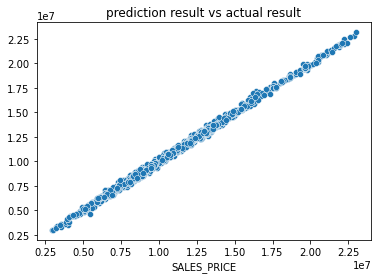

In [ ]:
sns.scatterplot(x= Y_test, y=pred)
plt.title("prediction result vs actual result")
plt.show()

# FEATURE IMPORTANCE

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verb0sity=0)
model.fit(X_train,Y_train)
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[10:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[('BUILDTYPE_Commercial', 0.36888),
 ('AREA', 0.33542),
 ('PARK_FACIL', 0.11673),
 ('MZZONE', 0.03793),
 ('INT_SQFT', 0.0348),
 ('BUILDTYPE_House', 0.02651),
 ('STREET', 0.02448),
 ('N_BATHROOM', 0.01682),
 ('N_ROOM', 0.01614),
 ('SALE_COND', 0.00803),
 ('N_BEDROOM', 0.00764),
 ('HOME_AGE', 0.00297),
 ('UTILITY_AVAIL', 0.00289),
 ('BUILDTYPE_Other', 0.00076)]

# MODEL AND ITS EVALUATION

The r2 score of Linear_Regression model is : 0.9162870657901503

The cross_validation score of an knn regressor model : 0.9466146851179567

The cross_validation score of Decision tree regressor model : 0.9749113140840242

The cross_validation score of an XG_Boost regressor model : 0.9970709190987412

# IMPORTANT FEATURES

SUGGESTION TO BUYERS AND REAL ESTATE AGENTS

# what factors are fetching more money for the houses?

1) ROOMS

---
2) Area- In area we suggest to seller build more houses in T Nagar as first choice, beacuse higher sales price compare to all another areas



---

3) INT_SQFT


---

4) Commericial BUILD_TYPE- I would suggest builder to build a "Commercial" building.


---
5) MZZONE- RH(Residential Medium Density zone) is best choice for builder to make houses in RH zone due to higher sales price


---
6) PARKING_FACILITY- I would suggest the agent to build with the "Parking facility"

